# Report

## Dataset
The dataset used in this homework is **yeast_me2** from [imblearn](https://imbalanced-learn.org/stable/) package. There are 8 features and 1484 samples in it. The dataset is highly imbalanced, with ratio of classes 28.1:1. Due to this imbalance we perform experiments using oversampling method [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE) as well as without it and compare results.

## Models
We use the following models to perform prediction on the dataset:
*   Logistic regression (from [sklearn](https://scikit-learn.org/stable/) package) - probably the simplest gradient method for classification,
*   Random forest (as above) - another simple method,
*   [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html),
*   [TabPFN](https://github.com/automl/TabPFN)

## Metrics
We use the following metrics in order to properly showcase performance in inbalanced dataset setup:
*   accuracy,
*   confusion matrix,
*   F1 score,
*   area under RoC curve
*   recall,
*   precision

## Results

|                                          |   Accuracy |   F1 score |   Area under RoC curve |   Recall |   Precision |
|:-----------------------------------------|-----------:|-----------:|-----------------------:|---------:|------------:|
| ('Logistic regression', 'without SMOTE') |   0.97551  |   0        |               0.5      | 0        |    0        |
| ('Logistic regression', 'with SMOTE')    |   0.873469 |   0.225    |               0.813285 | 0.75     |    0.132353 |
| ('Random forest', 'without SMOTE')       |   0.97551  |   0        |               0.5      | 0        |    0        |
| ('Random forest', 'with SMOTE')          |   0.883673 |   0.25974  |               0.859135 | 0.833333 |    0.153846 |
| ('XGBoost', 'without SMOTE')             |   0.973469 |   0.434783 |               0.702057 | 0.416667 |    0.454545 |
| ('XGBoost', 'with SMOTE')                |   0.959184 |   0.375    |               0.735356 | 0.5      |    0.3      |
| ('TabPFN', 'without SMOTE')              |   0.97551  |   0.333333 |               0.621862 | 0.25     |    0.5      |
| ('TabPFN', 'with SMOTE')                 |   0.967347 |   0.428571 |               0.73954  | 0.5      |    0.375    |

## Discussion



# Appendix

## Imports and data loading

In [1]:
!pip install -U imbalanced-learn
!pip install tabpfn
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 3.4 MB/s eta 0:00:00


In [2]:
from imblearn.datasets import fetch_datasets

imblearn_datasets = fetch_datasets()

In [3]:
from collections import Counter

yeast_me2 = imblearn_datasets['yeast_me2']
print("dataset shape: ", yeast_me2.data.shape)
smaller, bigger = list(sorted(Counter(yeast_me2.target).values()))
print(f"{bigger=}, {smaller=}, imbalance ratio={bigger/smaller:.2f}")

dataset shape:  (1484, 8)
bigger=1433, smaller=51, imbalance ratio=28.10


In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X, y = yeast_me2.data, yeast_me2.target
y[y == -1] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, recall_score, precision_score

def evaluate_method(method_name, y_test, y_eval, verbose=False):
    results = {
        func.__name__: func(y_test, y_eval) for func in [
            accuracy_score,
            confusion_matrix,
            f1_score,
            roc_auc_score,
            recall_score,
            precision_score
        ]
    }

    if verbose:
        print(method_name, ' results:')
        for func_name, score in results.items():
            print("\t", func_name, ": ", score)

    return results

## Logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression

# Without SMOTE.
logistic_regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_eval_logistic_regression = logistic_regression.predict(X_test)
results_logistic_regression = evaluate_method('Logistic regression', y_test, y_eval_logistic_regression)

# With SMOTE.
logistic_regression_smote = LogisticRegression(random_state=42).fit(X_resampled, y_resampled)
y_eval_logistic_regression_smote = logistic_regression_smote.predict(X_test)
results_logistic_regression_smote = evaluate_method('Logistic regression with SMOTE', y_test, y_eval_logistic_regression_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Without SMOTE.
random_forest = RandomForestClassifier(max_depth=4, random_state=42).fit(X_train, y_train)
y_eval_random_forest = random_forest.predict(X_test)
results_random_forest = evaluate_method('Random forest', y_test, y_eval_random_forest)

# With SMOTE.
random_forest_smote = RandomForestClassifier(max_depth=4, random_state=42).fit(X_resampled, y_resampled)
y_eval_random_forest_smote = random_forest_smote.predict(X_test)
results_random_forest_smote = evaluate_method('Random forest with SMOTE', y_test, y_eval_random_forest_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient boosting

In [8]:
from xgboost import XGBClassifier

# Without SMOTE.
XGBoost_model = XGBClassifier().fit(X_train, y_train)
y_eval_XGBoost = XGBoost_model.predict(X_test)
results_XGBoost = evaluate_method('XGBoost', y_test, y_eval_XGBoost)

# With SMOTE.
XGBoost_model_smote = XGBClassifier().fit(X_resampled, y_resampled)
y_eval_XGBoost_smote = XGBoost_model_smote.predict(X_test)
results_XGBoost_smote = evaluate_method('XGBoost with SMOTE', y_test, y_eval_XGBoost_smote)

## TabPFN

In [9]:
from tabpfn import TabPFNClassifier

# Without SMOTE.
tab_pfn = TabPFNClassifier(device='cpu', N_ensemble_configurations=8).fit(X_train, y_train)
y_eval_tab_pfn = tab_pfn.predict(X_test)
results_tab_pfn = evaluate_method('TabPFN', y_test, y_eval_tab_pfn)

# With SMOTE
tab_pfn_smote = TabPFNClassifier(device='cpu', N_ensemble_configurations=8).fit(X_resampled, y_resampled, overwrite_warning=True)
y_eval_tab_pfn_smote = tab_pfn_smote.predict(X_test)
results_tab_pfn_smote = evaluate_method('TabPFN with SMOTE', y_test, y_eval_tab_pfn_smote)

We have to download the TabPFN, as there is no checkpoint at  /usr/local/lib/python3.10/dist-packages/tabpfn/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


## Comparison of results

In [10]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

results_dict = {
    ("Logistic regression", "without SMOTE"): results_logistic_regression,
    ("Logistic regression", "with SMOTE"): results_logistic_regression_smote,
    ("Random forest", "without SMOTE"): results_random_forest,
    ("Random forest", "with SMOTE"): results_random_forest_smote,
    ("XGBoost", "without SMOTE"): results_XGBoost,
    ("XGBoost", "with SMOTE"): results_XGBoost_smote,
    ("TabPFN", "without SMOTE"): results_tab_pfn,
    ("TabPFN", "with SMOTE"): results_tab_pfn_smote,
}

results = pd.DataFrame(results_dict).T.drop('confusion_matrix', axis=1).rename(columns={
    'accuracy_score': 'Accuracy',
    'f1_score': 'F1 score',
    'roc_auc_score': 'Area under RoC curve',
    'precision_score': 'Precision',
    'recall_score': 'Recall'
})

display(results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

Accuracy F1 score Area under RoC curve  \
Logistic regression without SMOTE     0.98     0.00                 0.50   
                    with SMOTE        0.87     0.23                 0.81   
Random forest       without SMOTE     0.98     0.00                 0.50   
                    with SMOTE        0.88     0.26                 0.86   
XGBoost             without SMOTE     0.97     0.43                 0.70   
                    with SMOTE        0.96     0.37                 0.74   
TabPFN              without SMOTE     0.98     0.33                 0.62   
                    with SMOTE        0.97     0.43                 0.74   

                                  Recall Precision  
Logistic regression without SMOTE   0.00      0.00  
                    with SMOTE      0.75      0.13  
Random forest       without SMOTE   0.00      0.00  
                    with SMOTE      0.83      0.15  
XGBoost             without SMOTE   0.42      0.45  
                    with SMOTE      0.50      0.30  
TabPFN              without SMOTE   0.25      0.50  
                    with SMOTE      0.50      0.38

In [16]:
results.to_html()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Accuracy</th>\n      <th>F1 score</th>\n      <th>Area under RoC curve</th>\n      <th>Recall</th>\n      <th>Precision</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Logistic regression without SMOTE</th>\n      <td>0.98</td>\n      <td>0.00</td>\n      <td>0.50</td>\n      <td>0.00</td>\n      <td>0.00</td>\n    </tr>\n    <tr>\n      <th>Logistic regression with SMOTE</th>\n      <td>0.87</td>\n      <td>0.23</td>\n      <td>0.81</td>\n      <td>0.75</td>\n      <td>0.13</td>\n    </tr>\n    <tr>\n      <th>Random forest without SMOTE</th>\n      <td>0.98</td>\n      <td>0.00</td>\n      <td>0.50</td>\n      <td>0.00</td>\n      <td>0.00</td>\n    </tr>\n    <tr>\n      <th>Random forest with SMOTE</th>\n      <td>0.88</td>\n      <td>0.26</td>\n      <td>0.86</td>\n      <td>0.83</td>\n      <td>0.15</td>\n    </tr>\n    <tr>\n      <th>XGBoost without SMOT

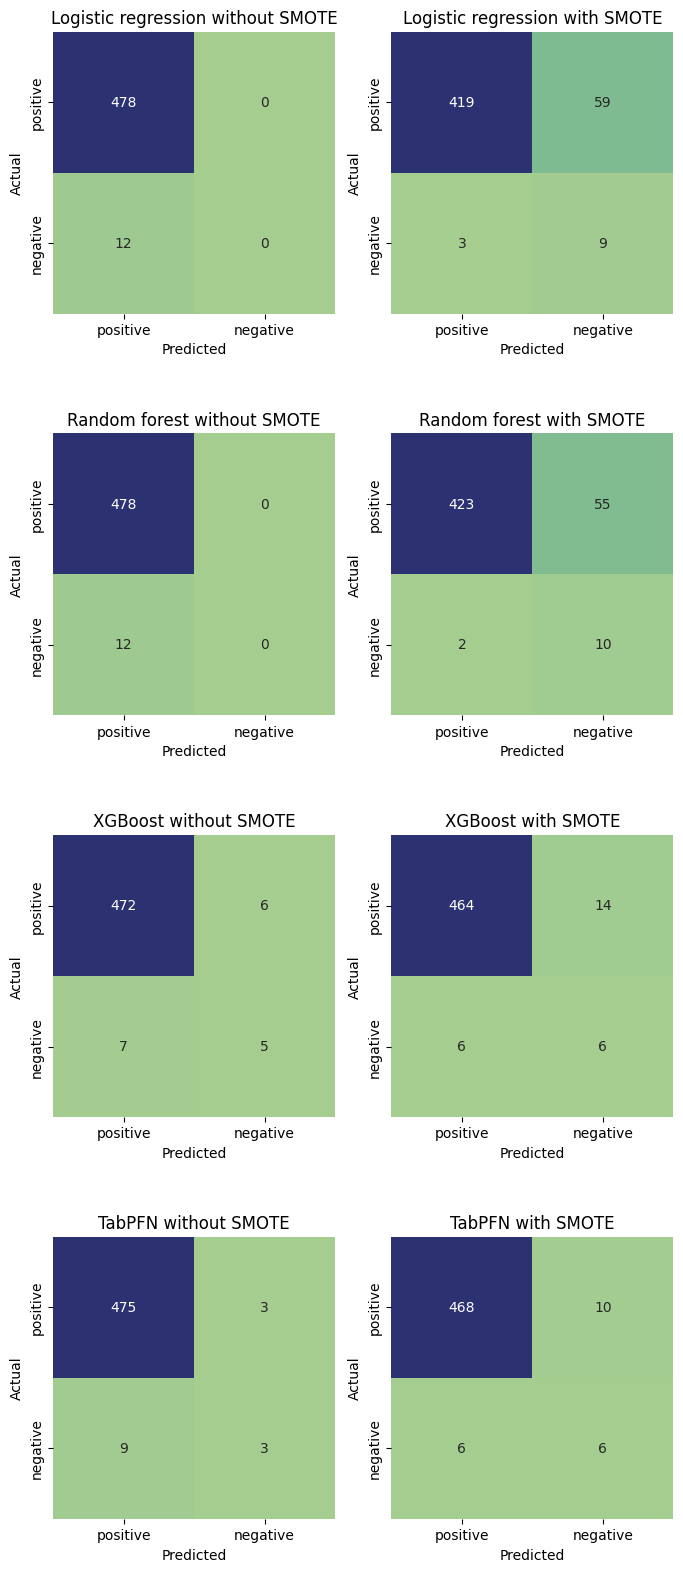

In [45]:

from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

fig, axes = plt.subplots(4, 2, squeeze=True, figsize=(8, 20))

for (method, results), ax in zip(results_dict.items(), chain(*axes)):
    sns.heatmap(results['confusion_matrix'], ax=ax, annot=True, fmt=".0f", cbar=False, cmap="crest",
                square=True, xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
    ax.set_title(' '.join(method))
    ax.set(xlabel='Predicted', ylabel='Actual')

fig.show()